In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
nx = 31
x = np.linspace(0,3,nx)
dx = x[2] - x[1]
gamma = 1.4
gamma_inverse = 1/gamma;
nt = 1400
cfl = 0.5
total_time = 0;

# Initial Condition

In [31]:
rho = np.zeros((nx))
T = np.zeros((nx))
A = np.zeros((nx))
v = np.zeros((nx))
P = np.zeros((nx))
mach_number = np.zeros((nx))
mass_flow = np.zeros((nx))

rho_throat = np.zeros((nt))
pressure_throat = np.zeros((nt))
velocity_throat = np.zeros((nt))
temp_throat = np.zeros((nt))
mach_number_throat = np.zeros((nt))
mass_flow_throat = np.zeros((nt))

#Initial profile
for i in range(nx):
    if x[i] <=0.5:
        rho[i] = 1
        T[i] = 1
    elif(x[i] > 0.5 and x[i] <= 1.5):
        rho[i] = 1 - 0.366*(x[i] - 0.5)
        T[i] = 1 - 0.167*(x[i] - 0.5)
    elif(x[i]>1.5 and x[i]<=3):
        rho[i] = 0.634 - 0.3879*(x[i]-1.5)
        T[i] = 0.833 - 0.3507*(x[i]-1.5)

    A[i] = 1 + 2.2*((x[i]-1.5)**2)
    v[i] = 0.59/(rho[i]*A[i])
    P[i] = rho[i]*T[i]
    mass_flow[i] = rho[i]*v[i]*A[i]
    
mass_flow_rate_initial = rho*v*A
throat = np.where(A == 1)
throat = throat[0]

mass_flow_50 = np.zeros((nx))
mass_flow_100 = np.zeros((nx))
mass_flow_150 = np.zeros((nx))
mass_flow_200 = np.zeros((nx))
mass_flow_700 = np.zeros((nx))
print(T)
print(rho)
print(v)
print(mass_flow_rate_initial)
print(A)

[1.      1.      1.      1.      1.      1.      0.9833  0.9666  0.9499
 0.9332  0.9165  0.8998  0.8831  0.8664  0.8497  0.833   0.79793 0.76286
 0.72779 0.69272 0.65765 0.62258 0.58751 0.55244 0.51737 0.4823  0.44723
 0.41216 0.37709 0.34202 0.30695]
[1.      1.      1.      1.      1.      1.      0.9634  0.9268  0.8902
 0.8536  0.817   0.7804  0.7438  0.7072  0.6706  0.634   0.59521 0.55642
 0.51763 0.47884 0.44005 0.40126 0.36247 0.32368 0.28489 0.2461  0.20731
 0.16852 0.12973 0.09094 0.05215]
[0.09915966 0.11106928 0.12505299 0.1415547  0.16111415 0.184375
 0.22013457 0.26436838 0.31894726 0.38570885 0.46590595 0.55918828
 0.66212353 0.76679781 0.86086999 0.93059937 0.96990879 0.97458648
 0.95142762 0.91134937 0.86500434 0.82051805 0.78331132 0.75697174
 0.7444194  0.74918732 0.77716533 0.83998755 0.96394811 1.22134679
 1.90143171]
[0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59
 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59
 0.59 0.

# U1, U2, U3

In [32]:
#Initial Solution
U1 = np.zeros((nx))
U2 = np.zeros((nx))
U3 = np.zeros((nx))

U1_old = np.zeros((nx))
U2_old = np.zeros((nx))
U3_old = np.zeros((nx))

F1 = np.zeros((nx))
F2 = np.zeros((nx))
F3 = np.zeros((nx))
J = np.zeros((nx))

dU1_dt_p = np.zeros((nx))
dU2_dt_p = np.zeros((nx))
dU3_dt_p = np.zeros((nx))

dU1_dt_c = np.zeros((nx))
dU2_dt_c = np.zeros((nx))
dU3_dt_c = np.zeros((nx))

dU1_dt_av = np.zeros((nx))
dU2_dt_av = np.zeros((nx))
dU3_dt_av = np.zeros((nx))

for i in range(nx):
    U1[i] = rho[i]*A[i]
    U2[i] = rho[i]*A[i]*v[i]
    U3[i] = rho[i]*(T[i]/(gamma - 1) + (gamma/2)*(v[i]**2))*A[i]
print(U1)
print(U1[15])

print(U2)
print(U2[15])

print(U3)
print(U3[15])

[5.95       5.312      4.718      4.168      3.662      3.2
 2.6801788  2.2317344  1.8498356  1.5296512  1.26635    1.0551008
 0.8910724  0.7694336  0.6853532  0.634      0.60830462 0.60538496
 0.62012074 0.64739168 0.6820775  0.71905792 0.75321266 0.77942144
 0.79256398 0.78752    0.75916922 0.70239136 0.61206614 0.48307328
 0.3102925 ]
0.634
[0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59
 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59
 0.59 0.59 0.59]
0.59
[14.91595294 13.32587161 11.84664688 10.47846209  9.22154014  8.07614688
  6.67946511  5.50217032  4.52462231  3.727974    3.09394359  2.60439401
  2.24072211  1.98328067  1.81140084  1.70464254  1.6140336   1.55706414
  1.52123379  1.4975402   1.47866746  1.45805165  1.4298075   1.38908828
  1.33256728  1.2589666   1.16977741  1.07065892  0.97512062  0.91746803
  1.023402  ]
1.704642539432177


# Solving the equations

In [33]:
for time in range(nt):

    U1_old = U1.copy()
    U2_old = U2.copy()
    U3_old = U3.copy()

    dt=np.min((0.5*dx)/(T**0.5 + v))
    print(dt)

    #F1[:] = U2[:]
    #F2[:] = U2[:]**2/U1[:] + ((gamma-1/gamma))*(U3[:]-(gamma/2)*(U2[:]**2/U1[:]))
    #F3[:] = (gamma*((U2[:]*U3[:])/U1[:])) - (gamma*(gamma-1)/2)*(U2[:]**3/U1[:]**2)
    for i in range(nx):
        F1[i] = U2[i]
        F2[i] = ((U2[i]**2)/U1[i]) + (((gamma-1)/gamma))*(U3[i] - ((gamma/2)*((U2[i]**2)/U1[i])))
        F3[i] = (gamma*((U2[i]*U3[i])/U1[i])) - (gamma*(gamma-1)/2)*(U2[i]**3/U1[i]**2)
    print(F1[15])
    print(F2[15])
    print(F2[16])
    print(F3[15]) 
    print(F3[16])
    #Predictor step
    for i in range (1,nx-1):
        dA_dx = (A[i+1] - A[i])/dx
        J[i] = gamma_inverse*rho[i]*T[i]*dA_dx

        dU1_dt_p[i] = -((F1[i+1] - F1[i])/dx)
        dU2_dt_p[i] = -((F2[i+1] - F2[i])/dx) + J[i]
        dU3_dt_p[i] = -((F3[i+1] - F3[i])/dx)

        #solution update    
        U1[i] = U1[i] + dU1_dt_p[i]*dt #S1
        U2[i] = U2[i] + dU2_dt_p[i]*dt #S2 
        U3[i] = U3[i] + dU3_dt_p[i]*dt #S3


    #getting the primitives
    for i in range(1,nx-1):
        rho[i] = U1[i]/A[i]
        v[i] = U2[i]/U1[i]
        T[i] = (gamma - 1)*((U3[i]/U1[i]) - ((gamma/2)*(v[i]**2)))
        P[i] = rho[i]*T[i]

    #updating F values
    for i in range(1,nx-1):
        F1[i] = U2[i]
        F2[i] = ((U2[i]**2)/U1[i]) + (((gamma-1)/gamma))*(U3[i] - ((gamma/2)*((U2[i]**2)/U1[i])))
        F3[i] = gamma*(U2[i]*U3[i]/U1[i]) - (gamma*(gamma-1)/2)*(U2[i]**3/U1[i]**2)

    #update S
    
    #Corrector Step
    for i in range(nx-2,0,-1):
        dA_dx = (A[i] - A[i-1])/dx
        J[i] = gamma_inverse*rho[i]*T[i]*dA_dx

        dU1_dt_c[i] = -((F1[i] - F1[i-1])/dx)
        dU2_dt_c[i] = -((F2[i] - F2[i-1])/dx) + J[i]
        dU3_dt_c[i] = -((F3[i] - F3[i-1])/dx)
    
       
        #Final solution update 
        U1[i] = U1_old[i] + 0.5*(dU1_dt_p[i] + dU1_dt_c[i])*dt #S1
        U2[i] = U2_old[i] + 0.5*(dU2_dt_p[i] + dU2_dt_c[i])*dt #S2
        U3[i] = U3_old[i] + 0.5*(dU3_dt_p[i] + dU3_dt_c[i])*dt #S3
    #Applying boundary condition

    #inlet
    U1[0] = rho[0]*A[0]
    U2[0] = 2*U2[1] - U2[2]
    U3[0] = U1[0]*((T[0]/(gamma-1)) + (gamma/2)*(v[0]**2))

    #outlet
    U1[nx-1] = 2*U1[nx-2] - U1[nx-3]
    U2[nx-1] = 2*U2[nx-2] - U2[nx-3]
    U3[nx-1] = 2*U3[nx-2] - U3[nx-3]

    
    rho = U1/A
    v = U2/U1
    T = (gamma - 1)*((U3/U1) - ((gamma/2)*(v**2)))
    P = rho*T
    mass_flow = rho*A*v
    mach_number = v/T**0.5


    #calculating variables in throat
    rho_throat[time] = rho[throat] 
    pressure_throat[time] = P[throat] 
    velocity_throat[time] = v[throat] 
    temp_throat[time] = T[throat] 
    mach_number_throat[time] = mach_number[throat] 
    mass_flow_throat[time] = mass_flow[throat]

    if(time == 50):
        mass_flow_50[:] = mass_flow[:]
    if(time == 100):
        mass_flow_100[:] = mass_flow[:]
    if(time == 150):
        mass_flow_150[:] = mass_flow[:]
    if(time == 200):
        mass_flow_200[:] = mass_flow[:]
    if (time == 700):
        mass_flow_700[:] = mass_flow[:]


0.020362763456103643
0.59
0.9262836277602524
0.9189494062712701
2.077809271711332
2.0362440768784826
0.026016390321878302
0.5893433072464951
0.9254728297039407
0.9286979629885845
2.076515994819844
2.0628817719928176
0.026570312307443174
0.5862863440748414
0.920155786375368
0.9356629912242396
2.0635373898365668
2.082945517024734
0.02635100709103837
0.5814774075218151
0.9114444760415146
0.9363995019767988
2.0415351718824573
2.0870507140413808
0.02618080411872186
0.575829275380206
0.901046489267204
0.9317401383217452
2.0149135889972873
2.0771474199569653
0.026057496998503158
0.5700315540738243
0.8902623842833743
0.923211489812412
1.987058892559557
2.0570631355439084
0.025933340206056157
0.5646020800665902
0.8800689712931873
0.912406471888874
1.9605265619098082
2.0308175382670295
0.025772902949781726
0.5598937137630545
0.8711340749407377
0.9007981584730839
1.9370768719408962
2.0021411634263124
0.02565267524750718
0.5561055423516219
0.8638402949768537
0.8895961829464301
1.9177352203138216
1

In [34]:
T

array([1.00004478, 0.99955782, 0.99888354, 0.99800697, 0.99678591,
       0.99513236, 0.99279528, 0.98952754, 0.98483547, 0.9781349 ,
       0.96846068, 0.95467596, 0.93524952, 0.90882929, 0.87437655,
       0.84004528, 0.78314257, 0.73109491, 0.67836307, 0.62743235,
       0.57991794, 0.53661943, 0.49772765, 0.46308509, 0.43230213,
       0.40502667, 0.38067255, 0.35918619, 0.33947497, 0.32283672,
       0.30549242])

In [35]:
U3

array([14.91595294, 13.30264761, 11.7985203 , 10.40360717,  9.11718397,
        7.93889628,  6.86783134,  5.9031441 ,  5.0433947 ,  4.28688068,
        3.63110892,  3.07284263,  2.60752489,  2.22915979,  1.92977017,
        1.73449026,  1.52347357,  1.39509684,  1.30044548,  1.23055276,
        1.17839804,  1.13895283,  1.10854335,  1.08479213,  1.06575254,
        1.050509  ,  1.03770286,  1.02745014,  1.01818983,  1.0111164 ,
        1.00404296])

In [36]:
U1

array([5.95      , 5.30532949, 4.7042724 , 4.14657857, 3.63213991,
       3.16059531, 2.73169547, 2.34490122, 1.99969737, 1.69520861,
       1.43045736, 1.20397591, 1.01398278, 0.85802058, 0.73308954,
       0.65038695, 0.55930331, 0.50253063, 0.459669  , 0.4272531 ,
       0.40249396, 0.38335562, 0.36829897, 0.35632207, 0.3465595 ,
       0.33862468, 0.33187092, 0.32639205, 0.32139774, 0.31753247,
       0.31366721])

In [37]:
(gamma/2)*(v*v)

array([0.00677091, 0.00851761, 0.01083475, 0.01394436, 0.0181764 ,
       0.02400484, 0.03213954, 0.04361942, 0.05999029, 0.08348466,
       0.11727344, 0.16555604, 0.23344341, 0.32595277, 0.44643851,
       0.56674574, 0.76602086, 0.94840562, 1.13318342, 1.31156855,
       1.47794608, 1.62946002, 1.76558161, 1.88670193, 1.9944815 ,
       2.08971465, 2.1751453 , 2.24993637, 2.31931816, 2.37720106,
       2.43725053])

In [38]:
U3/U1

array([2.50688285, 2.50741215, 2.5080436 , 2.50896179, 2.51014118,
       2.51183575, 2.51412774, 2.51743828, 2.52207898, 2.52882192,
       2.53842514, 2.55224593, 2.57156721, 2.598026  , 2.63237988,
       2.66685895, 2.72387727, 2.7761429 , 2.82909109, 2.88014942,
       2.92774093, 2.9710086 , 3.00990074, 3.04441465, 3.07523682,
       3.10228132, 3.12682668, 3.14790185, 3.16800559, 3.18429288,
       3.20098157])

In [39]:
rho

array([1.        , 0.99874426, 0.99709038, 0.9948605 , 0.99184596,
       0.98768603, 0.98191785, 0.97379619, 0.96231827, 0.94598695,
       0.92287571, 0.89051473, 0.84639631, 0.78862186, 0.71730875,
       0.65038695, 0.54726351, 0.46188477, 0.383697  , 0.31601561,
       0.25967352, 0.21392612, 0.17723723, 0.14797428, 0.12457207,
       0.10582021, 0.09062559, 0.07830903, 0.06812161, 0.05977644,
       0.05271718])

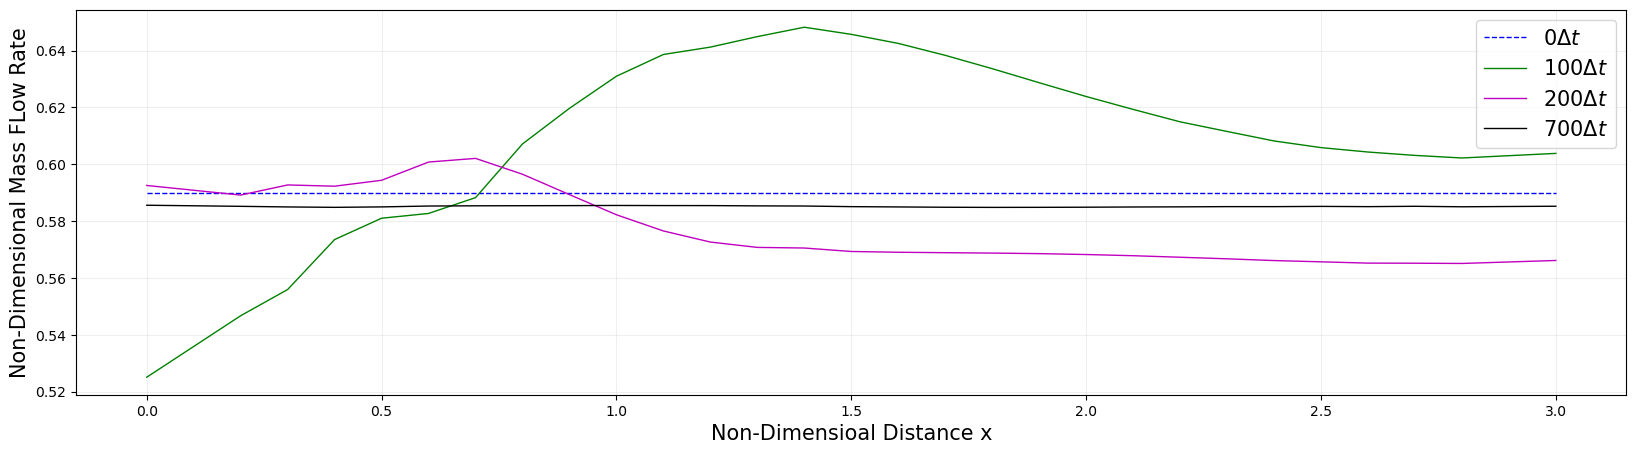

In [40]:
fig = plt.figure(figsize=(20,5), dpi = 100)
ax = fig.add_subplot(111)
ax.plot(x[:], mass_flow_rate_initial[:], '--', color = 'b', label = r"$0\Delta t$",linewidth = 1)
#ax.plot(x[:], mass_flow_50[:], color = 'r', label = r"$50\Delta t$",linewidth = 1)
ax.plot(x[:], mass_flow_100[:], color = 'g',label = r"$100\Delta t$",linewidth = 1)
#ax.plot(x[:], mass_flow_150[:], color = 'c',label = r"$150\Delta t$",linewidth = 1)
ax.plot(x[:], mass_flow_200[:], color = 'm',label = r"$200\Delta t$",linewidth = 1)
ax.plot(x[:], mass_flow_700[:], color = 'k',label = r"$700\Delta t$",linewidth = 1)

ax.set_xlabel("Non-Dimensioal Distance x")
ax.set_ylabel("Non-Dimensional Mass FLow Rate")
ax.grid(which='major', alpha = 0.2)
ax.grid(which='minor', alpha = 0.5)
plt.rc('axes', labelsize = 15)
ax.legend(prop={'size': 15})

In [55]:
mass_flow

array([0.58518257, 0.58522399, 0.5852654 , 0.58524825, 0.5852851 ,
       0.58528756, 0.58533314, 0.58534984, 0.58540408, 0.58543338,
       0.58549842, 0.58551941, 0.58556131, 0.58549882, 0.58544868,
       0.585217  , 0.5850846 , 0.584939  , 0.58485244, 0.58483277,
       0.58484347, 0.58489063, 0.58491854, 0.58498583, 0.58498374,
       0.58507707, 0.58501139, 0.5851614 , 0.58502438, 0.58515657,
       0.58528876])

In [56]:
import pandas as pd
df_mass_flow_non_coservative = pd.read_csv("non_coservative_nozzle.csv")

In [57]:
df_mass_flow_non_coservative

,Unnamed: 0,0
0,0,0.587752
1,1,0.593661
2,2,0.589075
3,3,0.590986
4,4,0.589248
5,5,0.589408
6,6,0.588461
7,7,0.588017
8,8,0.587240
9,9,0.586593


In [58]:
mass_flow_non_coservative = df_mass_flow_non_coservative[['0']].to_numpy()

In [59]:
mass_flow_non_coservative

array([[0.58775196],
       [0.59366145],
       [0.58907473],
       [0.59098615],
       [0.58924812],
       [0.58940831],
       [0.58846109],
       [0.58801684],
       [0.58724032],
       [0.58659252],
       [0.5858837 ],
       [0.58526534],
       [0.58472032],
       [0.58428871],
       [0.5839613 ],
       [0.58376859],
       [0.58379328],
       [0.58412313],
       [0.5847734 ],
       [0.58566774],
       [0.58668816],
       [0.58773277],
       [0.58871668],
       [0.58963059],
       [0.59039528],
       [0.59115712],
       [0.59158921],
       [0.59251624],
       [0.59182738],
       [0.59551323],
       [0.5855348 ]])

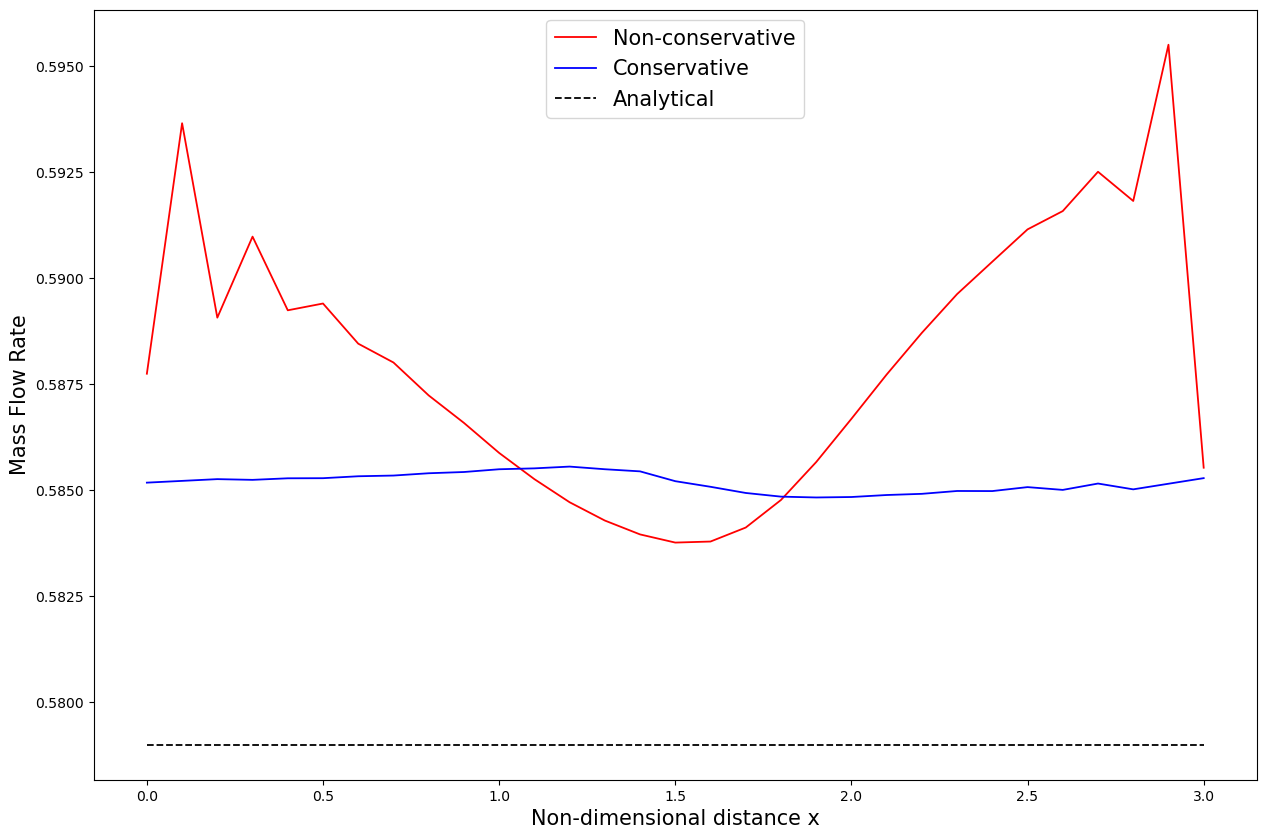

In [74]:
mass_flow_analytical = np.ones((nx))*0.579

fig = plt.figure(figsize=(15,10) , dpi = 100)
ax =fig.add_subplot(111)

ax.plot(x[:],mass_flow_non_coservative[:], color = 'red', linewidth = 1.3, label = "Non-conservative")
ax.plot(x[:],mass_flow[:], color = 'blue', linewidth = 1.3, label = "Conservative")
ax.plot(x[:],mass_flow_analytical[:], '--',color = 'black', linewidth = 1.3, label = "Analytical")

ax.set_xlabel("Non-dimensional distance x")
ax.set_ylabel("Mass Flow Rate")

ax.legend(prop={'size': 15}, loc = 9)